In [1]:
#Importación de librerías
import speech_recognition as sr

In [3]:
#Archivo de prueba
fileroute="Audios Prueba/Prueba2.wav"

In [5]:
# Se inicializa y prueba el reconocedor
r = sr.Recognizer()
with sr.AudioFile(fileroute) as source:
    # listen for the data (load audio to memory)
    audio_data = r.record(source)
    try:
        text = r.recognize_google(audio_data)
        print("Transcripción:", text)
    except sr.UnknownValueError:
        print("No se pudo entender el audio")
    except sr.RequestError as e:
        print(f"Error en el servicio de reconocimiento: {e}")

Transcripción: hey do you want papit


In [3]:

# Listar los micrófonos disponibles
microphones = sr.Microphone.list_microphone_names()

print("Micrófonos disponibles:")
for index, name in enumerate(microphones):
    print(f"{index}: {name}")

Micrófonos disponibles:
0: Microsoft Sound Mapper - Input
1: MicrÃ³fono (Realtek High Definit
2: MicrÃ³fono (WO Mic Device)
3: Microsoft Sound Mapper - Output
4: SMART_TV (NVIDIA High Definitio
5: CR240DM (NVIDIA High Definition
6: Altavoces (Realtek High Definit
7: Realtek Digital Output (Realtek
8: Controlador primario de captura de sonido
9: MicrÃ³fono (Realtek High Definition Audio)
10: MicrÃ³fono (WO Mic Device)
11: Controlador primario de sonido
12: SMART_TV (NVIDIA High Definition Audio)
13: CR240DM (NVIDIA High Definition Audio)
14: Altavoces (Realtek High Definition Audio)
15: Realtek Digital Output (Realtek High Definition Audio)
16: CR240DM (NVIDIA High Definition Audio)
17: Altavoces (Realtek High Definition Audio)
18: Realtek Digital Output (Realtek High Definition Audio)
19: SMART_TV (NVIDIA High Definition Audio)
20: MicrÃ³fono (WO Mic Device)
21: MicrÃ³fono (Realtek High Definition Audio)
22: Mezcla estÃ©reo (Realtek HD Audio Stereo input)
23: LÃ­nea de entrada (Realtek

In [15]:
import speech_recognition as sr
# Seleccionar el micrófono deseado (por ejemplo, el primero de la lista)
mic_index = 0  # Cambia este valor al índice de tu micrófono
recognizer = sr.Recognizer()

# Usar el micrófono seleccionado para capturar audio
with sr.Microphone(device_index=mic_index) as source:
    print(f"Usando el micrófono: {sr.Microphone.list_microphone_names()[mic_index]}")
    recognizer.adjust_for_ambient_noise(source, duration=1)
    print("Por favor, hable...")
    audio_data = recognizer.listen(source, timeout=5)
    print("Grabación completada. Procesando...")

    # Puedes intentar reconocer el audio para verificar que está capturando correctamente
    try:
        text = recognizer.recognize_google(audio_data)
        print("Texto reconocido:", text)
    except sr.UnknownValueError:
        print("No se pudo entender el audio.")
    except sr.RequestError as e:
        print(f"Error de solicitud a la API de Google; {e}")

Usando el micrófono: Microsoft Sound Mapper - Input
Por favor, hable...
Grabación completada. Procesando...
Texto reconocido: this is how speaking test


Se usa la distancia de Levenshtein para comparar la cadena obtenida vs la esperada.


---


***Distancia de Levenshtein:***
número mínimo de operaciones requeridas para transformar una cadena de caracteres en otra

In [15]:
import difflib

def distancia_levenshtein(frase_esperada, frase_reconocida):
    # Calcular la similitud y convertir a distancia
    ratio = difflib.SequenceMatcher(None, frase_esperada, frase_reconocida).ratio()
    distancia = int((1 - ratio) * max(len(frase_esperada), len(frase_reconocida)))
    return distancia

frase_esperada = "i love bbc"
frase_reconocida = text

# Calcular distancia y porcentaje de error
distancia = distancia_levenshtein(frase_esperada, frase_reconocida)
porcentaje_error = (distancia / len(frase_esperada)) * 100

print(f"Distancia de Levenshtein: {distancia}")
print(f"Porcentaje de error: {porcentaje_error:.2f}%")

# Retroalimentación basada en la distancia
if distancia == 0:
    feedback = "¡Perfecto! Pronunciación exacta."
elif distancia <= 3:
    feedback = "Muy bien, solo pequeños errores."
elif distancia <= 6:
    feedback = "Buen intento, pero hay algunas áreas que necesitan mejora."
else:
    feedback = "La pronunciación necesita bastante mejora. Intenta nuevamente."

print(feedback)

Distancia de Levenshtein: 4
Porcentaje de error: 40.00%
Buen intento, pero hay algunas áreas que necesitan mejora.


# Espectograma
***Interpretación***
* Colores brillantes: Indican mayor intensidad (energía) en esas frecuencias.
* Patrones repetitivos: Pueden indicar la presencia de ritmos, como sílabas o palabras.

***Uso en Retroalimentación***
* Claridad: Un espectrograma claro con picos definidos puede indicar una pronunciación clara.
* Ritmo y entonación: Puedes observar cómo varían las frecuencias para evaluar la entonación y ritmo de la palabra pronunciada.

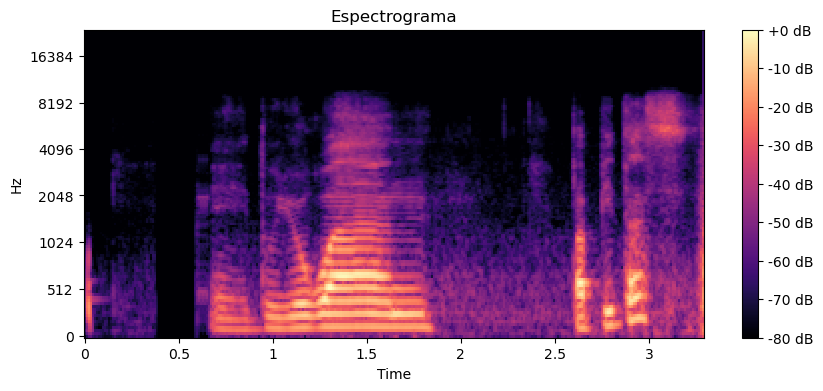

In [17]:
#Características de la pronunciación
import librosa
import librosa.display
# Mostrar espectrograma (puede dar pistas sobre la claridad del habla)
import matplotlib.pyplot as plt
import numpy as np

# Cargar el audio
y, sr = librosa.load(fileroute, sr=None)
plt.figure(figsize=(10, 4))
S = librosa.feature.melspectrogram(y=y, sr=sr, power=2.0)
librosa.display.specshow(librosa.power_to_db(S, ref=np.max), sr=sr, x_axis='time', y_axis='mel')
plt.title('Espectrograma')
plt.colorbar(format='%+2.0f dB')
plt.show()

# Energía del audio
***Interpretación***
* Valores altos: Indican una pronunciación enérgica, posiblemente clara y fuerte.
* Valores bajos: Pueden indicar una pronunciación suave, posiblemente con poca claridad.

***Uso en Retroalimentación***
* Volumen y claridad: Puedes sugerir al jugador que hable más alto o más claramente si la energía RMS es baja.

In [19]:
# Extraer características como la energía
rms = librosa.feature.rms(y=y)
print(f"Energía del audio: {rms.mean()}")

if(rms.mean()<0.01):
  print("Energía baja")
elif(rms.mean()<0.05):
  print("Energía Media")
else:
  print("Energía Alta")

Energía del audio: 0.03405359387397766
Energía Media


#Tempo
***Interpretación***
* Tempo bajo: Puede indicar una pronunciación lenta, lo cual es común en el aprendizaje de un nuevo idioma.
* Tempo alto: Puede indicar un habla rápida, lo que puede ser bueno para la fluidez, pero malo si la pronunciación no es clara.

***Uso en Retroalimentación***
* Velocidad del habla: Puedes sugerir al jugador que hable más lento o más rápido dependiendo de la situación.

In [22]:
# Detección de pausas
tempo, beats = librosa.beat.beat_track(y=y, sr=sr)
print(f"Tempo (ritmo): {tempo}")
if(tempo<80):
  print("Ritmo Lento")
elif(tempo<120):
  print("Ritmo Normal")
else:
  print("Ritmo Rapido")

Tempo (ritmo): [175.78125]
Ritmo Rapido


#On-sets
***Interpretación***
* Muchos onsets: Indican un habla rápida o la presencia de muchas sílabas en un corto período.
* Pocos onsets: Indican un habla lenta o pausada.

***Uso en Retroalimentación***

* Fluidez: Puedes analizar la fluidez del habla basándote en la cantidad y distribución de los onsets.

In [25]:
# Detección de sílabas o palabras
onset_env = librosa.onset.onset_strength(y=y, sr=sr)
times = librosa.times_like(onset_env, sr=sr)
onsets = librosa.onset.onset_detect(onset_envelope=onset_env, sr=sr)
duration = librosa.get_duration(y=y, sr=sr)
print(f"Número de onsets (picos de energía): {len(onsets)}")
print(f"Número de onsets (picos de energía) por segundo: {round(len(onsets)/duration)}")

if(round(len(onsets)/duration)<2):
  print("Pocos Onsets")
elif(round(len(onsets)/duration)<4):
  print("Normal")
else:
  print("Muchos Onsets")

Número de onsets (picos de energía): 13
Número de onsets (picos de energía) por segundo: 4
Muchos Onsets


#Resumen del análisis

In [28]:
print("Frase reconocida : ",{text})
print("Frase esperada : ",{frase_esperada})
print(f"Porcentaje de error: {porcentaje_error:.2f}%")
print(feedback)
if(rms.mean()<0.01):
  print("Energía baja")
elif(rms.mean()<0.05):
  print("Energía Media")
else:
  print("Energía Alta")
if(tempo<80):
  print("Ritmo Lento")
elif(tempo<120):
  print("Ritmo Normal")
else:
  print("Ritmo Rapido")
if(round(len(onsets)/duration)<2):
  print("Pocos Onsets")
elif(round(len(onsets)/duration)<4):
  print("Normal")
else:
  print("Muchos Onsets")

Frase reconocida :  {'I love BBC'}
Frase esperada :  {'i love bbc'}
Porcentaje de error: 40.00%
Buen intento, pero hay algunas áreas que necesitan mejora.
Energía Media
Ritmo Rapido
Muchos Onsets


#1.Espectro de Frecuencia
Valores Base:
* Frecuencias bajas dominantes (< 500 Hz): Común en sonidos vocales y en pronunciaciones con tono grave.
* Frecuencias medias dominantes (500 - 2000 Hz): Típico de la mayoría de las consonantes y voces claras.
* Frecuencias altas dominantes (> 2000 Hz): Asociado con consonantes fricativas como "s", "sh", y sonidos agudos.

***Interpretación***

* Bajo Dominante: Predominio de vocales o pronunciación grave.
* Medio Dominante: Buena claridad en la pronunciación de consonantes.
* Alto Dominante: Claridad en consonantes agudas, como "s" o "sh".

#2. Energía RMS (Root Mean Square Energy)
Valores Base:
* Bajo: < 0.01
* Medio: 0.01 - 0.05
* Alto: > 0.05

***Interpretación***

* Bajo: Puede indicar que el audio es suave, posiblemente poco claro o con poca energía en la pronunciación.
* Medio: Considerado un nivel típico de energía en el habla normal.
* Alto: Un nivel alto de energía indica una pronunciación fuerte y clara.

#3. Tempo (Ritmo)
Valores Base (en beats por minuto, BPM):
* Lento: < 80 BPM
* Normal: 80 - 120 BPM
* Rápido: > 120 BPM

***Interpretación***

* Lento: Puede ser indicativo de una pronunciación lenta, lo cual es común en los aprendices de un nuevo idioma.
* Normal: Es un ritmo típico en el habla cotidiana.
* Rápido: Indica un habla fluida, pero puede ser un problema si compromete la claridad.

#4. Onset Detection (Detección de Onsets)
Valores Base (número de onsets por segundo):
* Pocos Onsets: < 2 onsets/segundo
* Normal: 2 - 4 onsets/segundo
* Muchos Onsets: > 4 onsets/segundo

***Interpretación***

* Pocos Onsets: Indica un habla lenta, posiblemente con pocas sílabas pronunciadas.
* Normal: Representa un ritmo adecuado en el habla.
* Muchos Onsets: Puede indicar un habla rápida o la presencia de muchos sonidos discretos, como sílabas cortas o consonantes.